<a href="https://colab.research.google.com/github/ilyayath/imdb-classification/blob/main/1_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import string
from datasets import load_dataset
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from lxml.html import fromstring
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = load_dataset("imdb")

df_train = dataset['train'].to_pandas()
df_test = dataset['test'].to_pandas()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
def plot_label_distribution(df, title):
  plt.figure(figsize=(12, 6))
  sns.barplot(x=df['label'].value_counts().index, y=df['label'].value_counts())
  plt.title(title)
  plt.xlabel('Number')
  plt.ylabel('Class')
  plt.show()

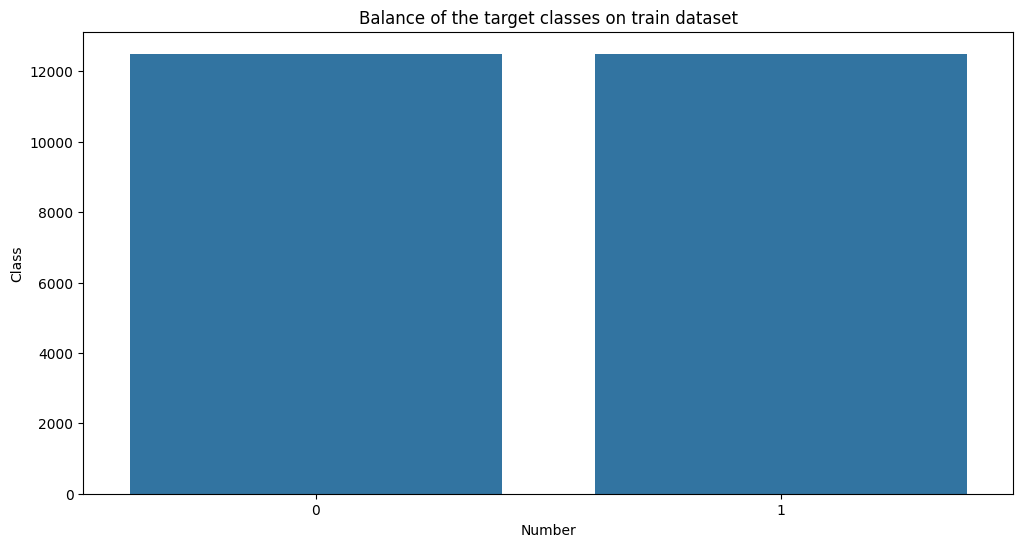

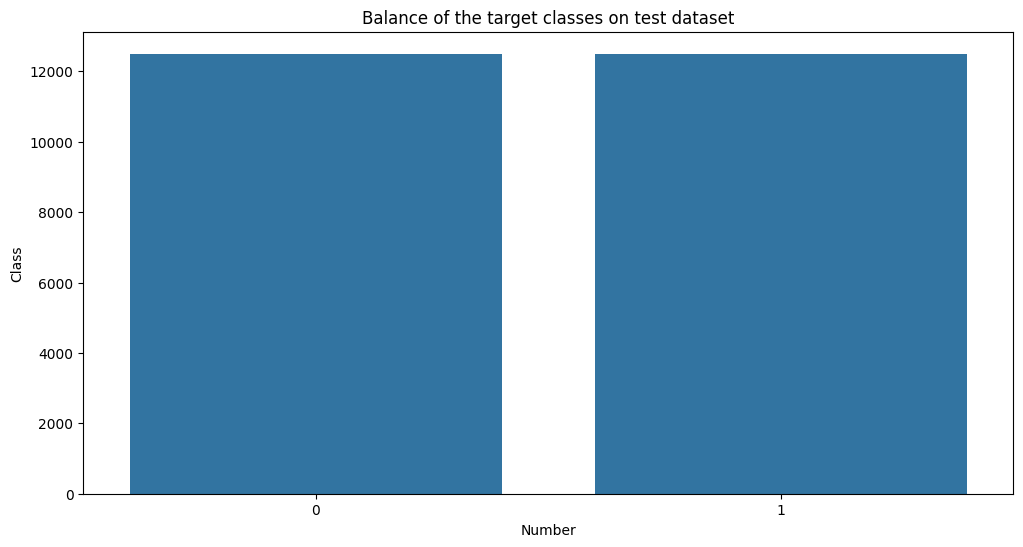

In [4]:
plot_label_distribution(df_train, 'Balance of the target classes on train dataset')
plot_label_distribution(df_test, 'Balance of the target classes on test dataset')

In [5]:
df_train['len_of_text'] = df_train["text"].apply(lambda x:len(x.split()))
df_test['len_of_text'] = df_test["text"].apply(lambda x:len(x.split()))

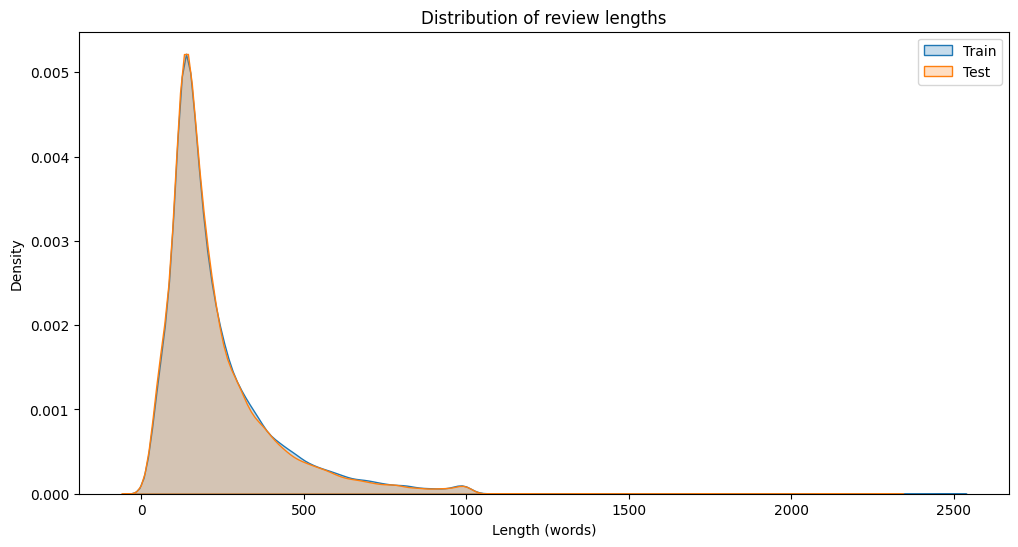

In [6]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_train['len_of_text'], label='Train', fill=True)
sns.kdeplot(df_test['len_of_text'], label='Test', fill=True)
plt.title('Distribution of review lengths')
plt.xlabel('Length (words)')
plt.legend()
plt.show()

In [7]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [10]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [11]:
def clean_text(text):
  text = BeautifulSoup(text,'html.parser').get_text()
  text = text.lower()
  text = re.sub(r'\s+', ' ',text)
  tokens = word_tokenize(text)
  tagged_tokens = pos_tag(tokens)
  lemmatized = [lemmatizer.lemmatize(token,get_wordnet_pos(tag)) for token,tag in tagged_tokens]
  filtered = [token for token in lemmatized
              if token not in stop_words
              and token.isalpha()
              and token not in string.punctuation]

  return " ".join(filtered)

In [12]:
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [13]:
df_train.to_csv('train.csv', index=False)
df_test.to_csv('test.csv', index=False)